In [6]:
!pip install --user scikit-image

  Using cached scikit_image-0.19.3-cp37-cp37m-win_amd64.whl (12.1 MB)
  Using cached networkx-2.6.3-py3-none-any.whl (1.9 MB)
  Using cached PyWavelets-1.3.0-cp37-cp37m-win_amd64.whl (4.2 MB)
  Using cached tifffile-2021.11.2-py3-none-any.whl (178 kB)


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, transform, color, util
from glob import glob

In [8]:
def split_into_patches(X, P):
    H, W = X.shape
    N = (H * W) // (P ** 2)
    patches = X.reshape(H // P, P, W // P, P).swapaxes(1, 2).reshape(-1, P, P)
    return patches

def mask_patches(patches, mask_rate=0.3):
    N = len(patches)
    num_masked = int(N * mask_rate)
    
    # 마스킹할 패치의 인덱스를 랜덤 샘플링
    masked_indices = np.random.choice(N, num_masked, replace=False)
    
    # 마스킹된 패치와 마스킹되지 않은 패치를 분리
    X_m = patches[masked_indices]
    mask = np.ones(N, dtype=bool)
    mask[masked_indices] = False
    X_v = patches[mask]
    
    return X_m, X_v

In [9]:
def visualize_patches(patches, num_cols=8):
    num_patches = len(patches)
    num_rows = (num_patches + num_cols - 1) // num_cols
    
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(num_cols * 2, num_rows * 2))
    for i, ax in enumerate(axs.flat):
        if i < num_patches:
            ax.imshow(patches[i], cmap='gray', interpolation='nearest')
            ax.axis('off')
        else:
            ax.axis('off')
    plt.tight_layout()
    plt.show()

In [15]:
H, W, P = 64, 64, 8  # 이미지 높이, 너비, 패치 크기
X = np.random.rand(H, W)

In [16]:
patches = split_into_patches(X, P)
X_m, X_v = mask_patches(patches, mask_rate=0.3)

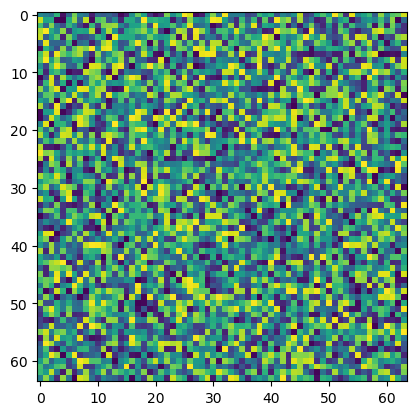

In [17]:
plt.imshow(X)

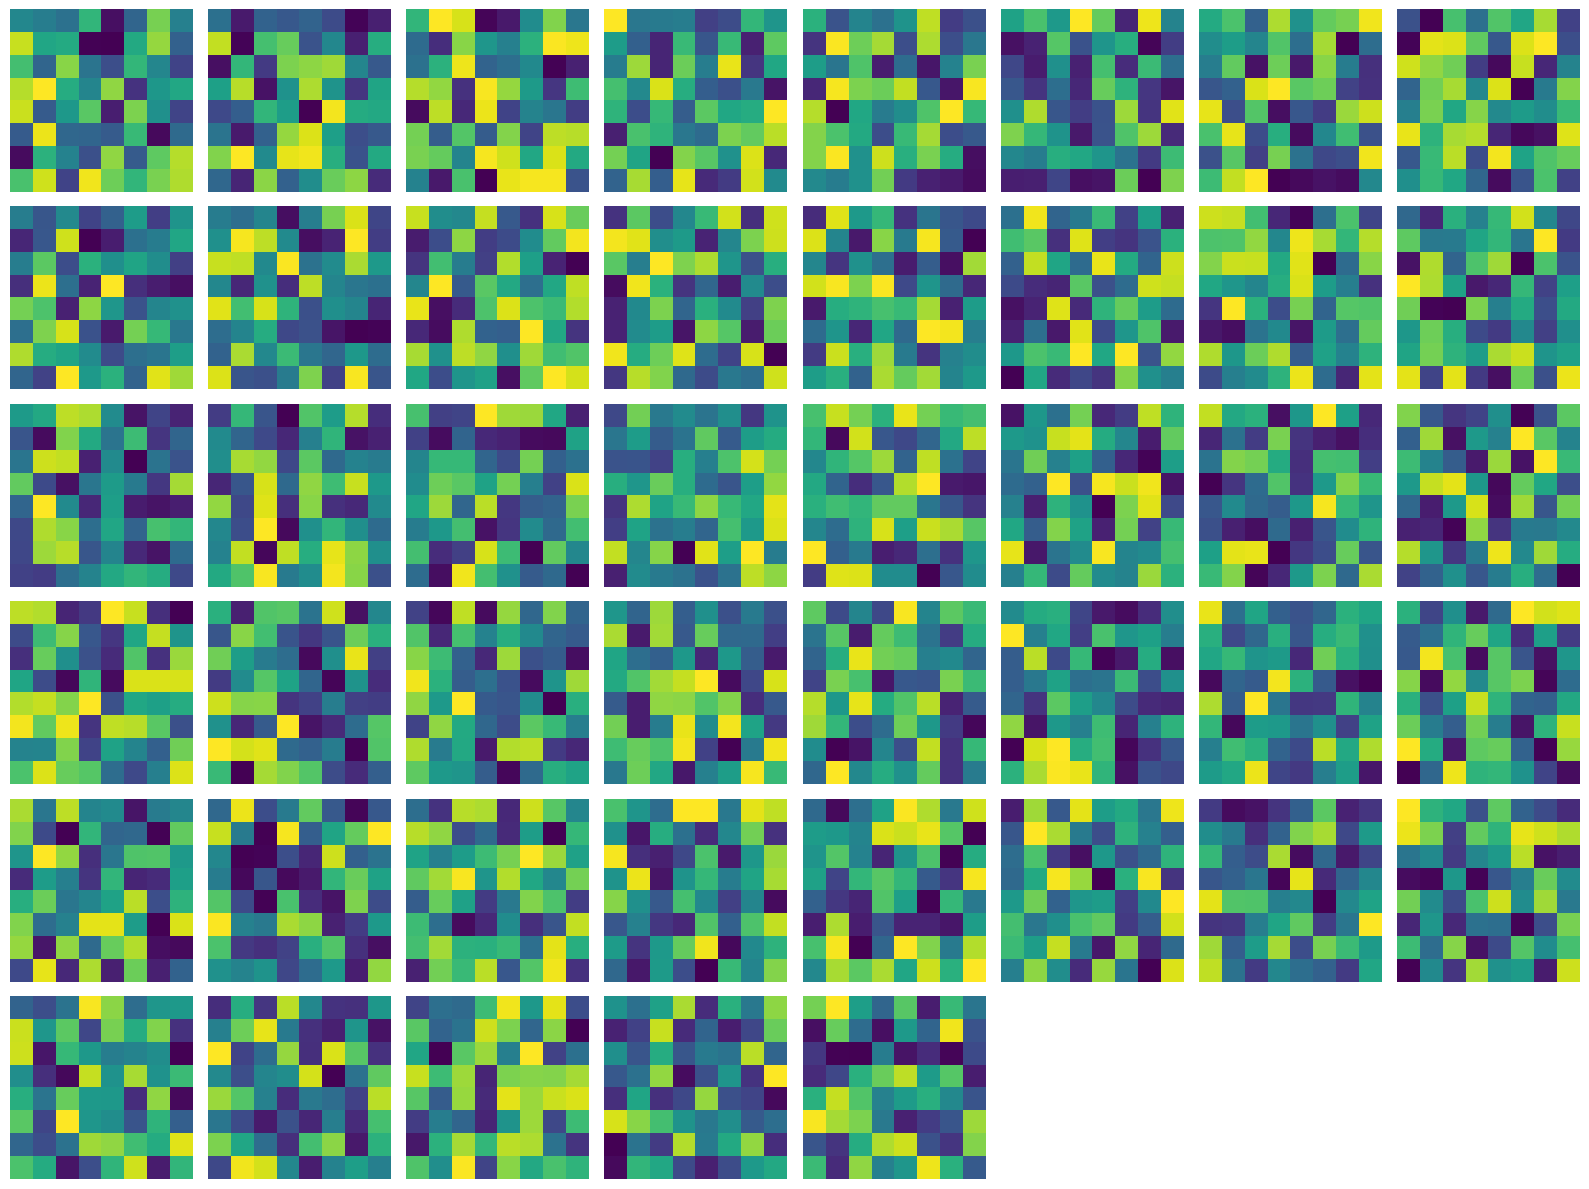

In [18]:
visualize_patches(X_v, num_cols=8)

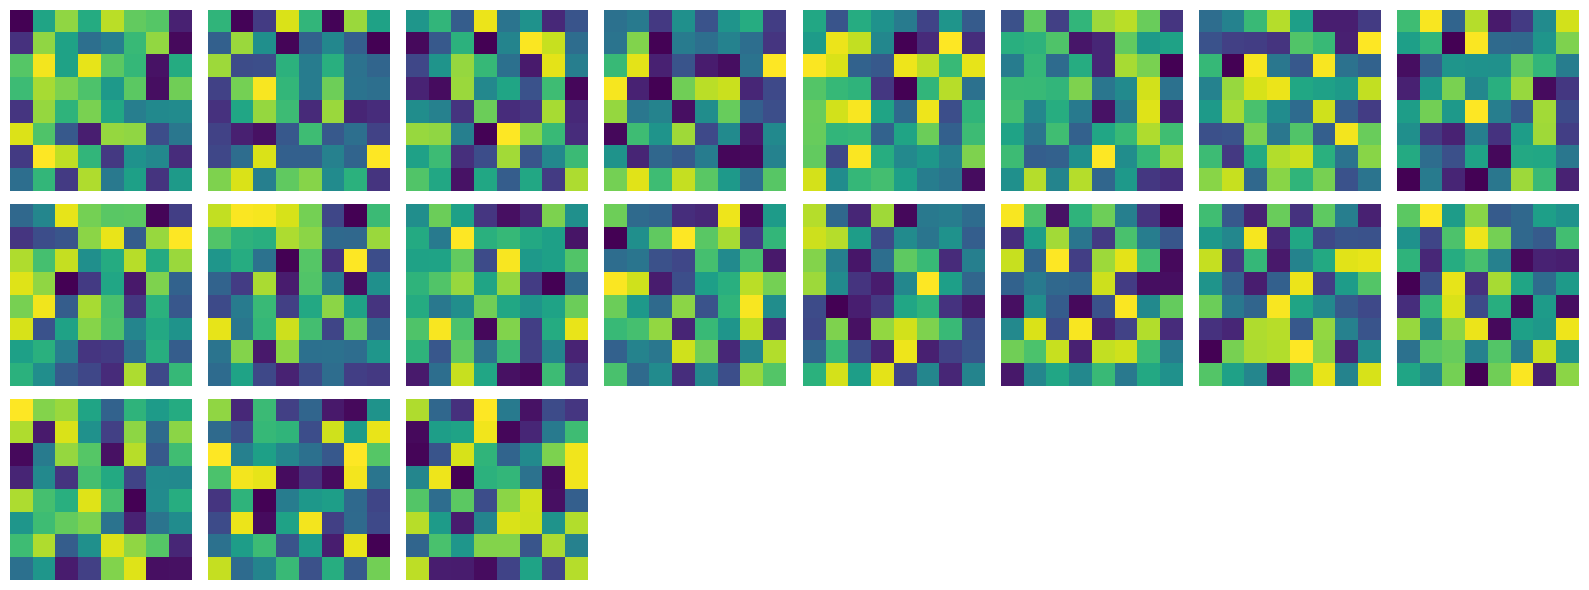

In [19]:
visualize_patches(X_m, num_cols=8)

In [5]:
img_path = 'data.jpg'

In [12]:
glob(img_path + '/**')[0]

'datasets/train/normal\\100_10.jpg'

In [10]:
X = io.imread(img_path)

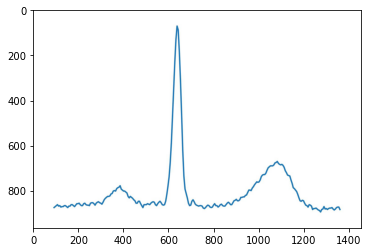

In [11]:
plt.imshow(X)

In [12]:
gray_image = color.rgb2gray(X)
inverted_image = util.invert(gray_image)

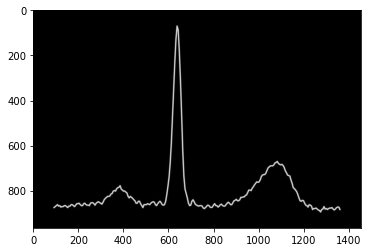

In [13]:
plt.imshow(inverted_image, 'gray')

In [14]:
target_height = 256
target_width = 256
resized_image = transform.resize(inverted_image, (target_height, target_width), mode='reflect', anti_aliasing=True)

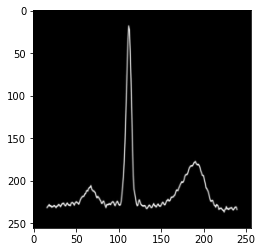

In [15]:
plt.imshow(resized_image, 'gray')

In [34]:
P = 32
patches = split_into_patches(resized_image, P)
X_m, X_v = mask_patches(patches, mask_rate=0.3)

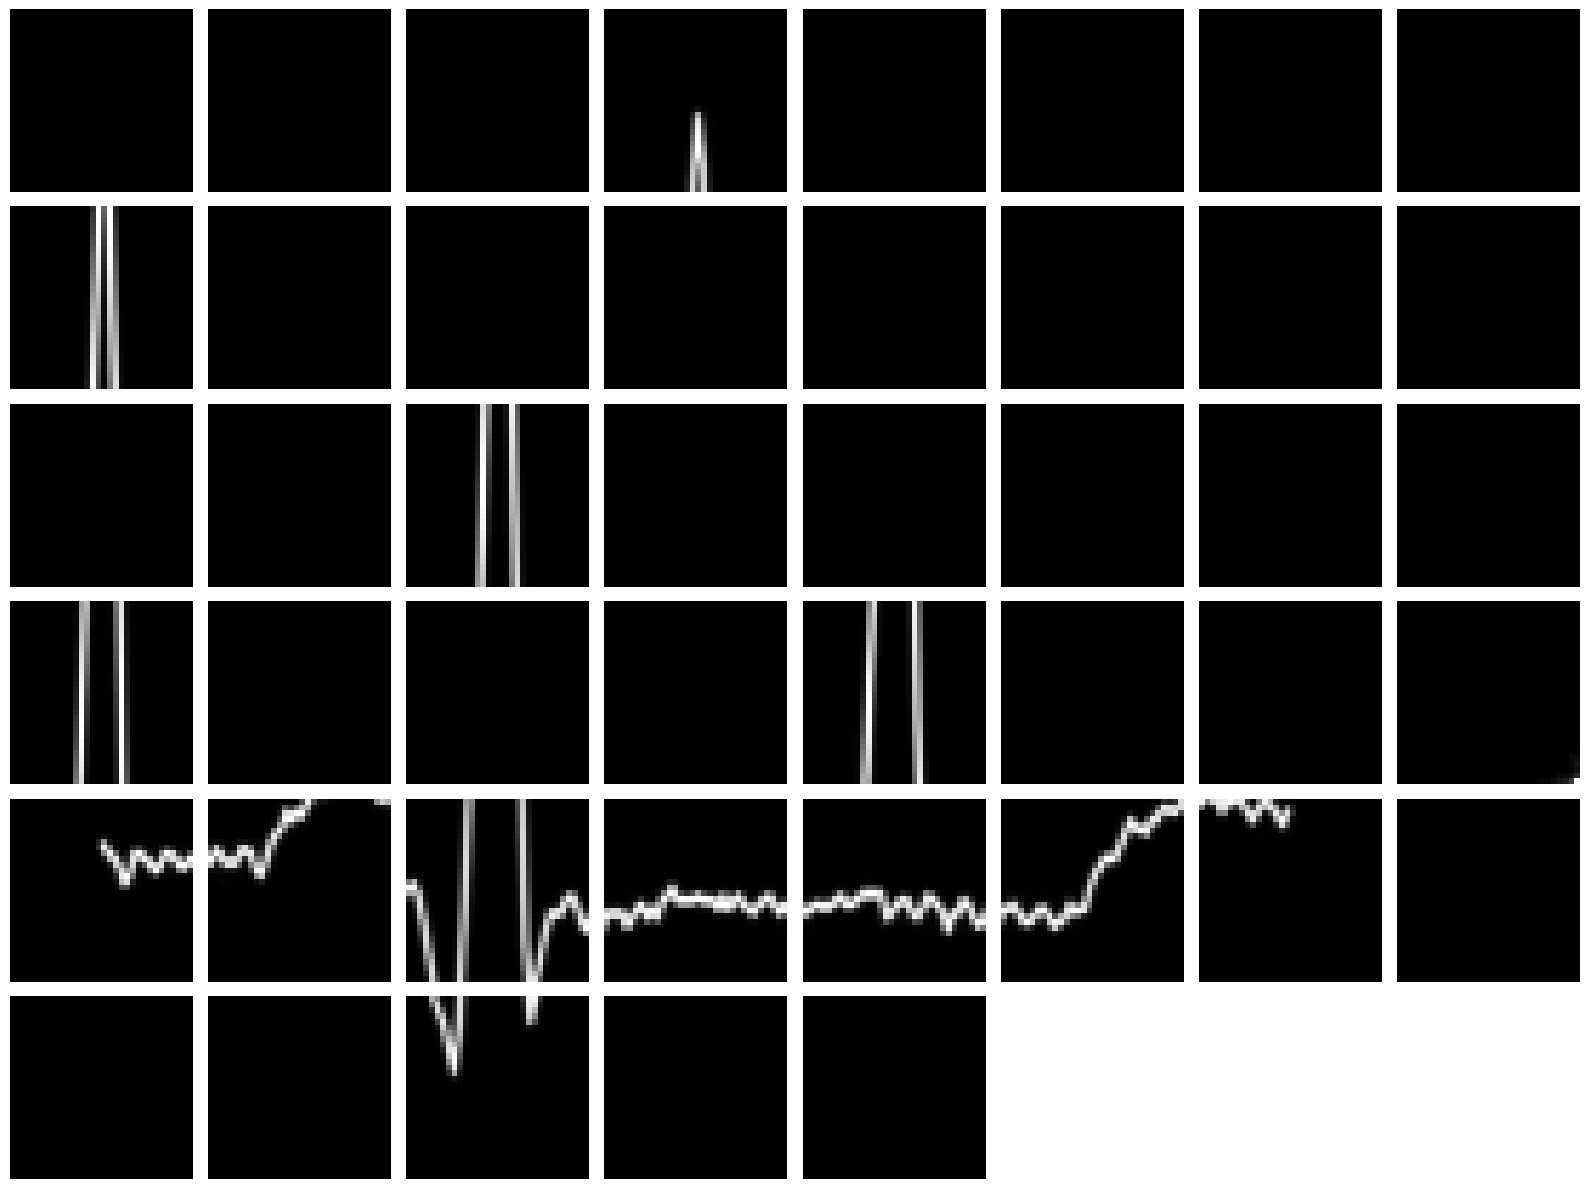

In [35]:
visualize_patches(X_v, num_cols=8)

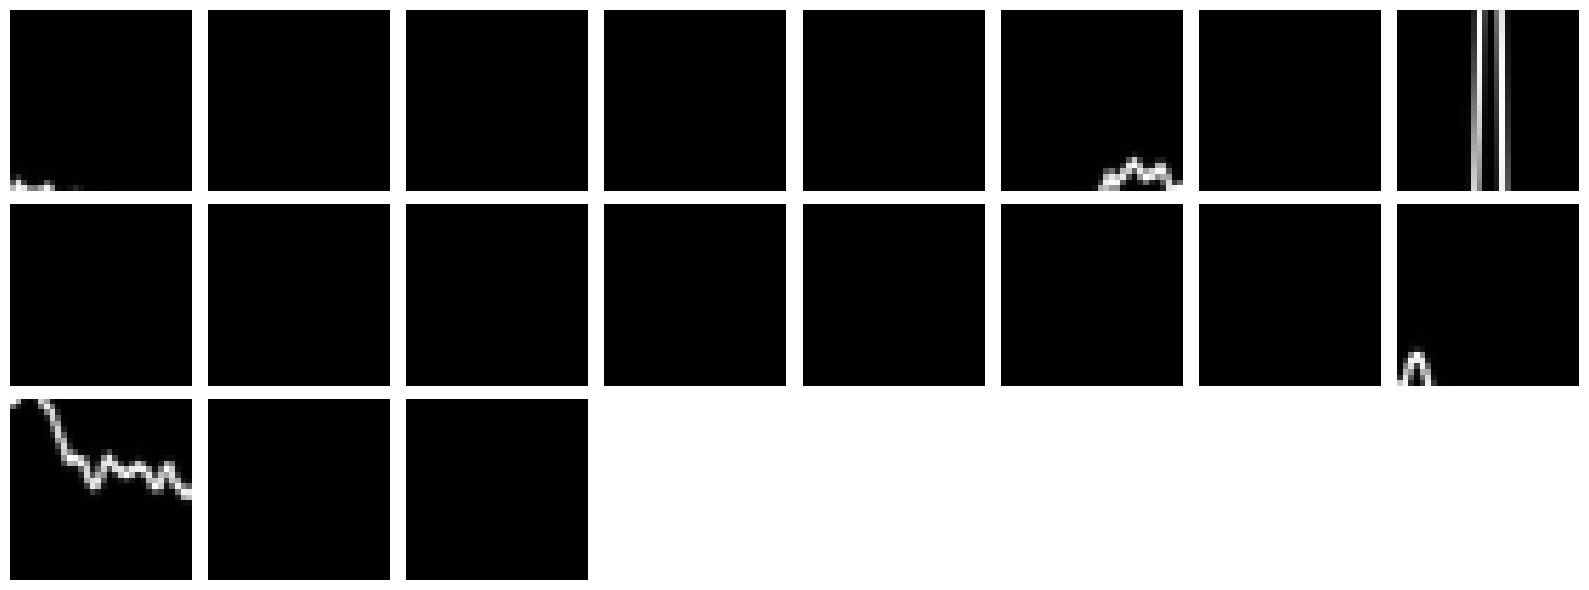

In [36]:
visualize_patches(X_m, num_cols=8)

In [37]:
import numpy as np

def mask_patches_normally(patches, mask_rate=0.3, mu=None, sigma=None):
    N = len(patches)  # 전체 패치의 수
    num_masked = int(N * mask_rate)  # 마스킹할 패치의 수

    if mu is None:
        mu = N / 2  # 기본적으로 중간 인덱스를 평균으로 설정
    if sigma is None:
        sigma = N / 4  # 전체 범위의 일부를 표준편차로 설정

    # 정규분포에서 마스킹할 패치 인덱스 샘플링
    sampled_indices = np.random.normal(mu, sigma, num_masked)
    
    # 샘플링된 인덱스를 유효한 범위 내의 정수로 변환
    sampled_indices = np.round(sampled_indices).astype(int)
    
    # 인덱스가 유효한 범위 내에 있도록 조정
    sampled_indices = np.clip(sampled_indices, 0, N - 1)
    
    # 중복 제거
    masked_indices = np.unique(sampled_indices)
    
    # 마스킹된 패치와 마스킹되지 않은 패치를 분리
    X_m = patches[masked_indices]
    mask = np.ones(N, dtype=bool)
    mask[masked_indices] = False
    X_v = patches[mask]
    
    return X_m, X_v, masked_indices

# 함수 사용 예시
# patches: 이미지를 패치로 분할한 결과
X_m, X_v, masked_indices = mask_patches_normally(resized_image, mask_rate=0.3)


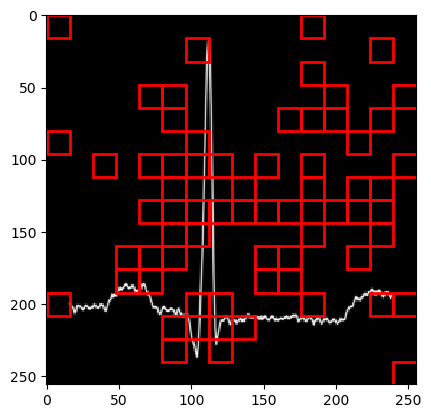

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# 이미지를 패치로 분할하는 함수 (이미지는 2D numpy array라고 가정)
def split_into_patches(image, patch_size):
    h, w = image.shape
    patches = image.reshape(h // patch_size, patch_size, w // patch_size, patch_size)
    patches = patches.swapaxes(1, 2).reshape(-1, patch_size, patch_size)
    return patches

# 마스킹할 패치 인덱스 선택 및 분리 (위에서 정의된 mask_patches_normally 함수 사용)
# 여기서는 해당 함수를 이미 정의했다고 가정합니다.

# 원본 이미지에 마스킹될 패치 위치 시각화 함수
def visualize_masked_patches(original_image, masked_indices, patch_size):
    fig, ax = plt.subplots(1)
    ax.imshow(original_image, cmap='gray')
    
    num_patches_per_row = original_image.shape[1] // patch_size
    for idx in masked_indices:
        row = (idx // num_patches_per_row) * patch_size
        col = (idx % num_patches_per_row) * patch_size
        rect = patches.Rectangle((col, row), patch_size, patch_size, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
    
    plt.show()

# 가정: 이미지는 2D numpy array 형태로 로드되었음
# image = 이미지 로딩 코드 (예: image = io.imread(image_path))
patch_size = 16  # 패치 크기 예시

# 이미지를 패치로 분할
image_patches = split_into_patches(resized_image, patch_size)

# 마스킹할 패치 선택 (여기서는 mask_patches_normally 함수 사용, 이미 정의되어 있다고 가정)
X_m, X_v, masked_indices = mask_patches_normally(image_patches, mask_rate=0.3)

# 원본 이미지에 마스킹될 패치 위치 시각화
visualize_masked_patches(resized_image, masked_indices, patch_size)


In [20]:
import numpy as np

def mask_patches_by_column(patches, patch_size, image_shape, mask_rate=0.3, mu=None, sigma=None):
    H, W = image_shape  # 이미지의 높이와 너비
    N = len(patches)  # 전체 패치의 수
    num_masked = int(N * mask_rate)  # 마스킹할 패치의 수

    patches_per_row = W // patch_size
    patches_per_col = H // patch_size

    if mu is None:
        mu = patches_per_row / 2
    if sigma is None:
        sigma = patches_per_row / 4

    # 정규분포에서 마스킹할 열 인덱스 샘플링
    sampled_col_indices = np.random.normal(mu, sigma, num_masked)
    
    # 샘플링된 인덱스를 유효한 범위 내의 정수로 변환
    sampled_col_indices = np.round(sampled_col_indices).astype(int)
    
    # 인덱스가 유효한 범위 내에 있도록 조정
    sampled_col_indices = np.clip(sampled_col_indices, 0, patches_per_row - 1)
    
    # 같은 열에 있는 모든 패치 인덱스를 마스킹 대상으로 선택
    masked_indices = np.unique([col + row * patches_per_row for col in sampled_col_indices for row in range(patches_per_col)])
    
    # 마스킹된 패치와 마스킹되지 않은 패치를 분리
    X_m = patches[masked_indices]
    mask = np.ones(N, dtype=bool)
    mask[masked_indices] = False
    X_v = patches[mask]
    
    return X_m, X_v, masked_indices

# 이미지의 높이와 너비, 패치 사이즈를 인자로 전달해야 합니다.
# 예를 들어, 이미지의 높이(H), 너비(W), 패치 크기(patch_size)를 알고 있다면,
H = 256
W = 256
patch_size = 16
X_m, X_v, masked_indices = mask_patches_by_column(resized_image, patch_size, (H, W), mask_rate=0.03)


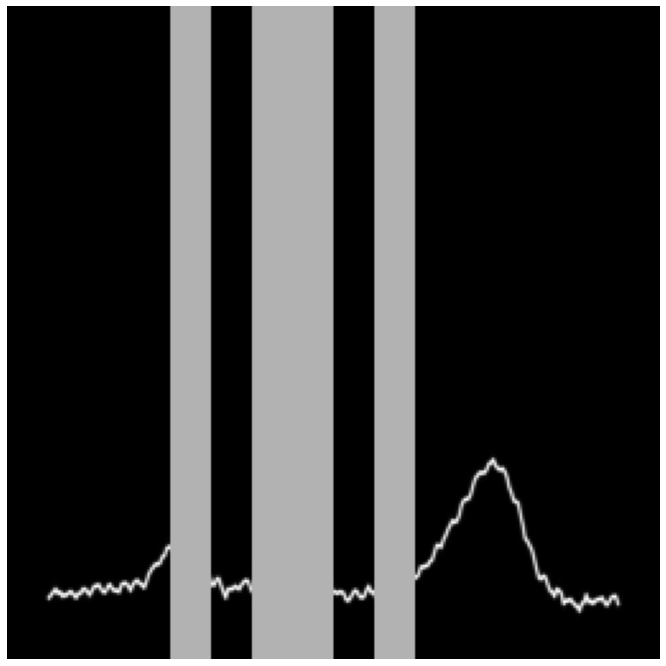

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# 이미지를 패치로 분할하는 함수 (이미지는 2D numpy array라고 가정)
def split_into_patches(image, patch_size):
    h, w = image.shape
    patches = image.reshape(h // patch_size, patch_size, w // patch_size, patch_size)
    patches = patches.swapaxes(1, 2).reshape(-1, patch_size, patch_size)
    return patches

# 마스킹된 이미지 생성 함수
def create_masked_image(original_image, masked_indices, patch_size):
    # 원본 이미지의 복사본 생성
    masked_image = np.copy(original_image)
    num_patches_per_row = original_image.shape[1] // patch_size
    
    # 마스킹할 패치 위치를 하얀색으로 변경
    for idx in masked_indices:
        row = (idx // num_patches_per_row) * patch_size
        col = (idx % num_patches_per_row) * patch_size
        masked_image[row:row+patch_size, col:col+patch_size] = 0.4  # 하얀색으로 변경

    return masked_image

# 마스킹된 이미지 시각화 함수
def visualize_masked_image(original_image, masked_image):
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    
    ax[0].imshow(original_image, cmap='gray')
    ax[0].set_title('Original Image')
    ax[0].axis('off')

    ax[1].imshow(masked_image, cmap='gray')
    ax[1].set_title('Masked Image')
    ax[1].axis('off')

    plt.show()

# 가정: 이미지는 2D numpy array 형태로 로드되었음
# image = 이미지 로딩 코드 (예: image = io.imread(image_path))
# patch_size = 16  # 패치 크기 예시

# 이미지를 패치로 분할하고, 마스킹할 패치 선택
# 이전 단계에서 정의된 함수를 사용하여 이미지를 패치로 분할하고, 마스킹할 패치를 선택한다고 가정
# 예: image_patches = split_into_patches(image, patch_size)
# 예: X_m, X_v, masked_indices = mask_patches_normally(image_patches, mask_rate=0.3)

# 마스킹된 이미지 생성
masked_image = create_masked_image(resized_image, masked_indices, patch_size)

# 마스킹된 이미지 시각화
# visualize_masked_image(resized_image, masked_image)
plt.figure(figsize=(12, 12))
plt.axis('off')
plt.imshow(masked_image,'gray')
plt.savefig('mask_image.png',bbox_inches='tight',dpi=500 )


In [84]:
io.imsave('org.png', resized_image)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


In [33]:
import sys
import os
import requests

import torch
import numpy as np

import matplotlib.pyplot as plt
from PIL import Image


AttributeError: module 'lib' has no attribute 'X509_V_FLAG_NOTIFY_POLICY'

In [ ]:
imagenet_mean = np.array([0.1307])
imagenet_std = np.array([0.3081])

def show_image(image, title=''):
    # image is [H, W, 3]
    assert image.shape[2] == 3
    plt.imshow(torch.clip((image * imagenet_std + imagenet_mean) * 255, 0, 255).int())
    plt.title(title, fontsize=16)
    plt.axis('off')
    return

def prepare_model(chkpt_dir, arch='mae_vit_large_patch16'):
    # build model
    model = getattr(models_mae, arch)()
    # load model
    checkpoint = torch.load(chkpt_dir, map_location='cpu')
    msg = model.load_state_dict(checkpoint['model'], strict=False)
    print(msg)
    return model

def run_one_image(img, model):
    x = torch.tensor(img)

    # make it a batch-like
    x = x.unsqueeze(dim=0)
    x = torch.einsum('nhwc->nchw', x)

    # run MAE
    loss, y, mask = model(x.float(), mask_ratio=0.75)
    y = model.unpatchify(y)
    y = torch.einsum('nchw->nhwc', y).detach().cpu()

    # visualize the mask
    mask = mask.detach()
    mask = mask.unsqueeze(-1).repeat(1, 1, model.patch_embed.patch_size[0]**2 *3)  # (N, H*W, p*p*3)
    mask = model.unpatchify(mask)  # 1 is removing, 0 is keeping
    mask = torch.einsum('nchw->nhwc', mask).detach().cpu()
    
    x = torch.einsum('nchw->nhwc', x)

    # masked image
    im_masked = x * (1 - mask)

    # MAE reconstruction pasted with visible patches
    im_paste = x * (1 - mask) + y * mask

    # make the plt figure larger
    plt.rcParams['figure.figsize'] = [24, 24]

    plt.subplot(1, 4, 1)
    show_image(x[0], "original")

    plt.subplot(1, 4, 2)
    show_image(im_masked[0], "masked")

    plt.subplot(1, 4, 3)
    show_image(y[0], "reconstruction")

    plt.subplot(1, 4, 4)
    show_image(im_paste[0], "reconstruction + visible")

    plt.show()